In [ ]:
#Name- Pranav Shelke(BE-IT)
#Roll.no- 69
#Assignment No- 03
#Problem Statement- Object detection using Transfer Learning of CNN architectures.

In [1]:
# Object-Recognition-Using-CNN 

In [2]:
#https://github.com/kunal-visoulia/Object-Recognition-Using-CNN/blob/master/Object%20Recognition.ipynb

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)#should be and is 32x32x3

(32, 32, 3)


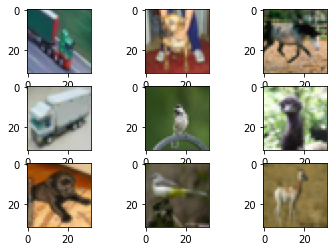

In [7]:
#create a grid of 3x3 images(9 images of 3x3 subplots)
for i in range(0,9):
    plt.subplot(330+1+i)#denotes 3x3 and postion
    img=X_train[i+50]#no need to transpose else transpose([1,2,0])
    plt.imshow(img)
    
plt.show()

In [9]:
#On the given set, images are blurry(32x32 pixels only), Humans were only 94% accurate in classifying

In [10]:
# Building a convolutional neural network for object recognition on CIFAR-10

In [8]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [11]:
seed=6
np.random.seed(seed)

#again load the dataset as we set the random seed and not apllying any shuffling effects or random effects
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255(RGB) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

In [13]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [14]:
print(y_train.shape)
print(y_train[0])
print(y_train.min())
print(y_train.max())

(50000, 1)
[6]
0
9


In [15]:
#hot encode outputs
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_classes=Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [16]:
# Building the All-CNN

# Building the All-CNN

In [17]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
#conv2d is the main convulational layer
from keras.optimizers import SGD#stochastic gradient descent 

In [18]:
def allcnn(weights=None):
    #taking random weights ny default else usr passed pretrained weights
    
    model=Sequential()#we will be adding one layer after another
    
    #not the input layer but need to tell the conv. layer to accept input
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))#32x32x3 channels
    model.add(Activation('relu'))#required for each conv. layer
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))#drop neurons randomly;helps the network generalize(prevent overfitting on training data) better so instead of having individual neurons 
    #that are controlling specific classes/features, the features are spread out over the entire network
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights,if passed
    if weights:
        model.load_weights(weights)
    
    #return model
    return model

Defining Parameters and Training the Model
define hyper parameters, such as learning rate and momentum,
define an optimizer,
compile the model, and
fit the model to the training data.

In [20]:
#define the hyper parameters(generic or do Grid Search)
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#define training parameters
epochs=30 
batch_size=32#run 32 images times then update the parameters instead of updating them after every image

model=allcnn()

#define optimizer and compile model
sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())#1.3m parameters and all are trainable

# #fit the model(update the parameters and loss)
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 192)      

In [23]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.5
#no need for training parameters

# define weights and build model
weights='all_cnn_weights_0.9088_0.4994.hdf5'#KERAS format hdf5
#pretrained weights  that have already gone through the above press
#model=allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#measure of model's perfrmane is accuracy

# print model summary
print (model.summary())

# test the model with pretrained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 192)      

In [25]:
classes=range(0,10)#10 not included

names = ['Pranav','Shubham','Vaibhav','Prajwal','Rutik']

# zip the names and classes to make a dictionary of class_labels
class_labels=dict(zip(classes,names))
print(class_labels)
# generate batch of 9 images to predict
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions=model.predict(batch,verbose=1)

{0: 'Pranav', 1: 'Shubham', 2: 'Vaibhav', 3: 'Prajwal', 4: 'Rutik'}
1/1 [==============================] - 0s 21ms/step


In [26]:
print(predictions)
print(predictions.shape)

[[3.33951727e-10 1.00033328e-12 7.14500857e-06 7.88736315e-07
  9.87972558e-01 3.09744850e-04 5.87650817e-09 1.17098382e-02
  1.15491880e-10 2.91485169e-10]
 [2.58181099e-05 1.09674065e-08 2.77964328e-03 1.73664212e-01
  1.48573322e-02 5.05837917e-01 5.82503853e-03 2.96798170e-01
  2.83169470e-07 2.11626626e-04]
 [9.59606404e-14 1.36438563e-13 1.77001636e-09 1.23475008e-08
  2.43550247e-09 6.50879142e-11 1.00000000e+00 1.08209663e-09
  7.47209794e-10 1.54107098e-12]
 [1.67425625e-07 1.04238644e-08 5.81997272e-04 4.47102040e-01
  2.11626184e-06 7.12321125e-05 5.52234232e-01 1.14905720e-08
  8.02162532e-08 8.20360310e-06]
 [9.67882678e-20 1.00000000e+00 2.51789391e-32 1.21570787e-25
  1.51209782e-30 5.26512332e-33 2.18924983e-28 5.01738262e-28
  3.09104119e-18 2.77678878e-12]
 [1.11690775e-10 1.00000000e+00 7.71041895e-14 2.78876314e-12
  1.04767077e-16 5.10157819e-17 2.08504397e-13 7.61819117e-18
  3.22676391e-12 5.74089165e-10]
 [4.80774615e-05 2.39488713e-06 2.93296371e-02 8.07248056e

In [27]:
#these are individual class probabilities, should sum to 1.0
for image in predictions:
    print(np.sum(image))

#shows that there is hundred percent probability that images to belong to one of the classes

1.0000001
1.0000001
1.0
1.0000001
1.0
1.0
0.99999994
1.0
1.0


In [28]:
# use np.argmax() to convert class probabilities to class labels
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 6 1 1 3 6 8]


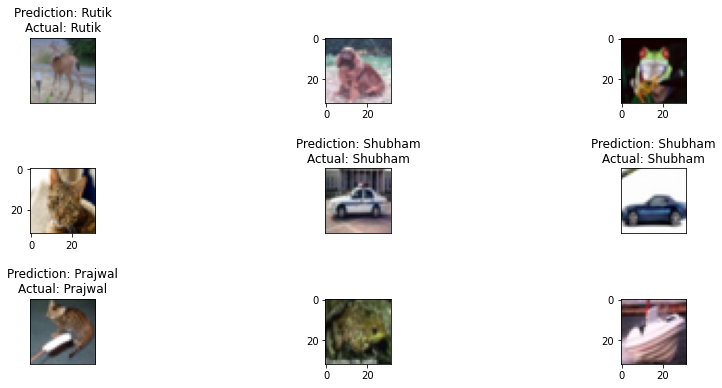

In [29]:
#create a grid of 3x3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate (batch):
        # determine label for each prediction, set title
        for key,value in class_labels.items():
            if class_result[i]==key:
                title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
                axs[i].set_title(title)
                axs[i].axes.get_xaxis().set_visible(False)
                axs[i].axes.get_yaxis().set_visible(False)
            
        # plot the image
        axs[i].imshow(img)
    
# show the plot
plt.show()    